## Loading datasets

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784' , as_frame=False)

In [3]:
x , y = mnist['data'],mnist['target']

In [4]:
x[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [8]:
some_digit=x[2000]
some_digit_image=some_digit.reshape(28,28) # necessary to reshape the array to get an image as output)

(-0.5, 27.5, 27.5, -0.5)

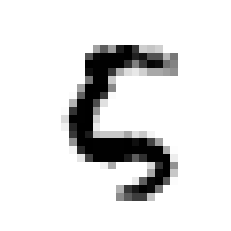

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis('off')

In [10]:
y[2000]

'5'

In [11]:
#MNIST datset has already been divided into test and train data sets where first 60000 datasets are training data
x_train , x_test = x[:60000] , x[60000:]
y_train , y_test = y[:60000] , y[60000:]

In [12]:
#We use shuffle to optimize the results 
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train , y_train = x_train[shuffle_index] , y_train[shuffle_index]

## Creating a specific number detector(7 in my case)

In [13]:
y_train=y_train.astype(np.int8) # converting str to int
y_test7=y_test.astype(np.int8)
y_train_7=(y_train==7)
y_test_7=(y_test==7)


In [14]:
y_train_7 , y_test_7

(array([False, False, False, ..., False, False, False]),
 array([False, False, False, ..., False, False, False]))

In [70]:
#  we need a binary classifier that detects if the number is a 7
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# model = LogisticRegression(solver='lbfgs')
# model = SGDClassifier()
# model = DecisionTreeClassifier()
model = RandomForestClassifier()
model.fit(x_train,y_train_7)

RandomForestClassifier()

In [71]:
model.predict([some_digit])

array([False])

In [72]:
## Cross Validation 
from sklearn.model_selection import cross_val_score
a=cross_val_score(model,x_train,y_train_7,cv=3,scoring='accuracy')

In [73]:
a.mean()

0.9891333333333333

In [74]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(model,x_train,y_train_7,cv=3)

In [75]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix
takes actual labels and predicted labels

In [114]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


In [125]:
confusion_matrix(y_train_7,y_train_pred) # This is not a perfect prediction


array([[53657,    78],
       [  606,  5659]], dtype=int64)

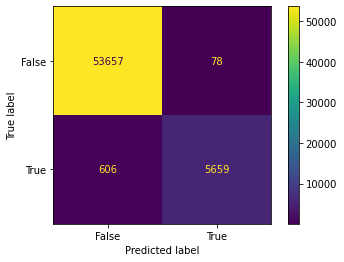

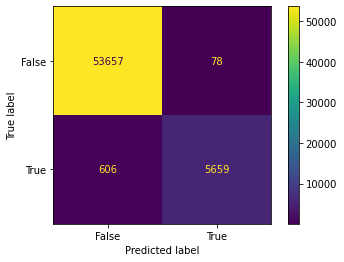

In [131]:
disp = ConfusionMatrixDisplay.from_predictions(y_train_7,y_train_pred)
disp.plot()
plt.xlabel=("Predicted")
plt.ylabel=("Actual")
plt.show()

## Precision and Recall

In [29]:
from sklearn.metrics import precision_score , recall_score

In [77]:
precision_score(y_train_7,y_train_pred) #this is my precision score

0.9864040439253966

In [78]:
recall_score(y_train_7,y_train_pred) # This is my recall score

0.9032721468475658

## Now calculating F1 score 


In [32]:
from sklearn.metrics import f1_score

In [79]:
f1_score(y_train_7,y_train_pred) #This is my f1 score which is a better way to evaluate classifiers 

0.9430094984169306

## Precision - Recall curve

In [35]:
from sklearn.metrics import precision_recall_curve

In [89]:
## we need to calculate the decision function which gives us the threshold value for the model
#y_Scores=cross_val_predict(model,x_train,y_train_7,cv=3,method='decision_function')
y_Scores = model.predict_proba(x_train)

In [91]:
y_Scores

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [99]:
precisions , recalls , thresholds = precision_recall_curve(y_train_7, y_Scores[:,-1] )

In [100]:
precisions

array([0.10441667, 0.30242325, 0.47879251, 0.61409528, 0.71649131,
       0.78587556, 0.83656029, 0.87219825, 0.90312815, 0.92308826,
       0.93815514, 0.95140471, 0.96074222, 0.96697021, 0.97161911,
       0.97524907, 0.97967162, 0.98212886, 0.98568282, 0.98754729,
       0.99020073, 0.99145434, 0.99349826, 0.99444444, 0.99491822,
       0.99555061, 0.99618381, 0.99729386, 0.99761146, 0.99824729,
       0.99904321, 0.99920255, 0.99936194, 0.99968087, 0.99984041,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [101]:
recalls

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99984038, 0.99968077, 0.99952115, 0.99936153,
       0.99872306, 0.99840383, 0.99728651, 0.99648843, 0.99600958,
       0.99409417, 0.99138069, 0.99010375, 0.98659218, 0.98324022,
       0.97940942, 0.97557861, 0.97174781, 0.96632083, 0.96169194,
       0.95626496, 0.95291301, 0.94684757, 0.93998404, 0.93312051,
       0.92609737, 0.91747805, 0.90901836, 0.89656824, 0.88699122,
       0.87470072, 0.86464485, 0.85155626, 0.83798883, 0.82298484,
       0.80558659, 0.7811652 , 0.76025539, 0.7377494 , 0.70566

In [102]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.28, 0.29, 0.3 , 0.32, 0.33, 0.35,
       0.37, 0.38, 0.53, 0.56, 0.57, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  ])

## Plotting the precision-recall curve

<function matplotlib.pyplot.show(close=None, block=None)>

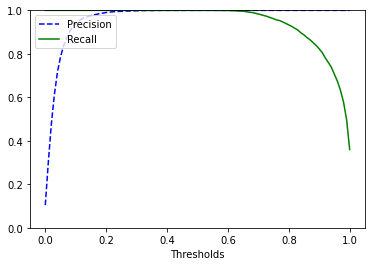

In [103]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision") # slicing and removing last values because they are just default values and we want to avoid error
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc='upper left')    
plt.ylim([0,1])
plt.show